In [1]:
# Import libraries to read and transform data and plot the transformed datasets.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### *Read individual datasets*

In [2]:
df_ais = pd.read_csv(r'aisles.csv')
df_prod = pd.read_csv(r'products.csv')
df_dep = pd.read_csv(r'departments.csv')
df_ord = pd.read_csv(r'orders.csv')
df_opp = pd.read_csv(r'order_products__prior.csv')
df_opt = pd.read_csv(r'order_products__train.csv')

In [3]:
df_ais.head(3)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [4]:
df_dep.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [5]:
df_prod.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [6]:
df_ord.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [7]:
df_opp.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


In [8]:
df_opt.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


In [9]:
print("Number of customers: {:,}".format(df_ord['user_id'].nunique()))
print("Number of product: {:,}".format(df_prod['product_id'].nunique()))
print("Number of aisles: {:,}".format(df_ais['aisle_id'].nunique()))
print("Number of departments: {:,}".format(df_dep['department_id'].nunique()))
print("Number of orders: {:,}".format(df_ord['order_id'].nunique()))

Number of customers: 206,209
Number of product: 49,688
Number of aisles: 134
Number of departments: 21
Number of orders: 3,421,083


In [9]:
# Merge products dataset with aisles and department dataset
df_pd = df_prod.merge(df_ais,on='aisle_id',how='left')

In [10]:
df_pd = df_pd.merge(df_dep,on='department_id',how='left')

In [11]:
df_pd.head(3)

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages


In [12]:
# merge ordered products-prior dataset with the products dataset from above
df_oppPd = df_opp.merge(df_pd,on='product_id',how='left')

In [13]:
df_oppPd.drop(['aisle_id','department_id'],axis=1,inplace=True)

In [14]:
df_oppPd.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle,department
0,2,33120,1,1,Organic Egg Whites,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,spices seasonings,pantry


In [15]:
df_dep['department'].unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [16]:
# Count unique orders per category to determine the most popular product categories
df_depRnk = df_oppPd.groupby(['department'])['order_id'].nunique().reset_index().rename(columns={'order_id':'OrdCnt'})

In [17]:
df_depRnk.head(3)

,department,OrdCnt
0,alcohol,84689
1,babies,177712
2,bakery,881556


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

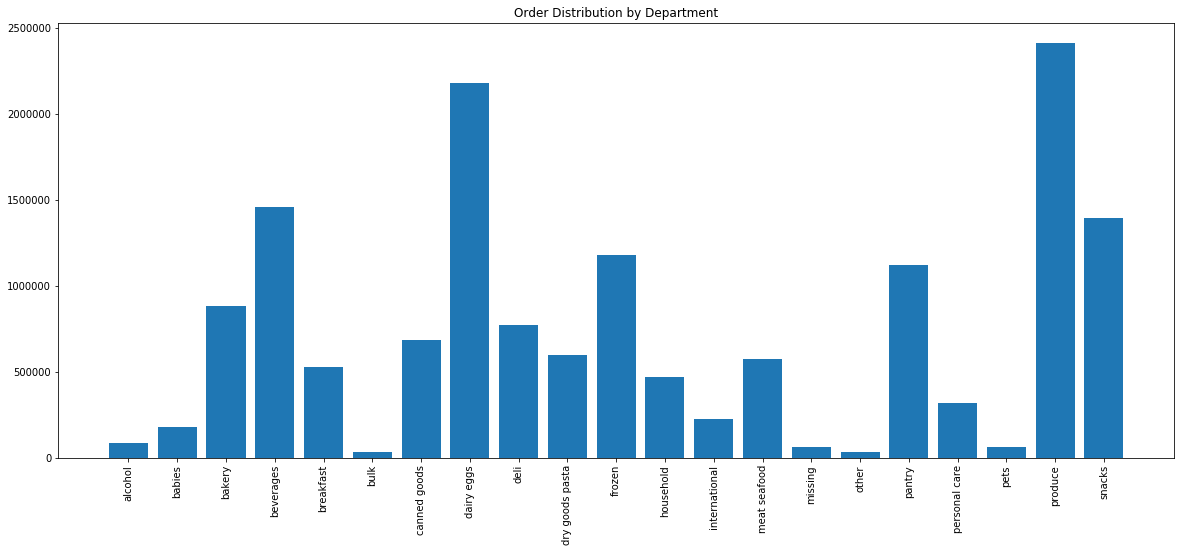

In [18]:
#Plot most popular categories by order count
%matplotlib inline
plt.rcParams['figure.figsize']=(20,8)
p=plt.bar(df_depRnk['department'],df_depRnk['OrdCnt'])
plt.title('Order Distribution by Department')
plt.xticks(rotation=90)

### What Type of Products are Reordered the Most

In [43]:
# Filter ordered products-prior to determine most popular categories for re-order and compare it with overall order distribution
df_oppPd_reOrd=df_oppPd[df_oppPd['reordered']>0]

In [44]:
# Group ordered products-prior dataset to get Re-ordered count by department
df_oppPd_reOrd_Dep = df_oppPd_reOrd.groupby(['department']
                                           )['order_id'].nunique().reset_index().rename(columns={'order_id':'ReOrdCnt'})

In [46]:
df_oppPd_reOrd_Dep.head()

,department,ReOrdCnt
0,alcohol,56064
1,babies,120116
2,bakery,589018
3,beverages,1068642
4,breakfast,316491


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

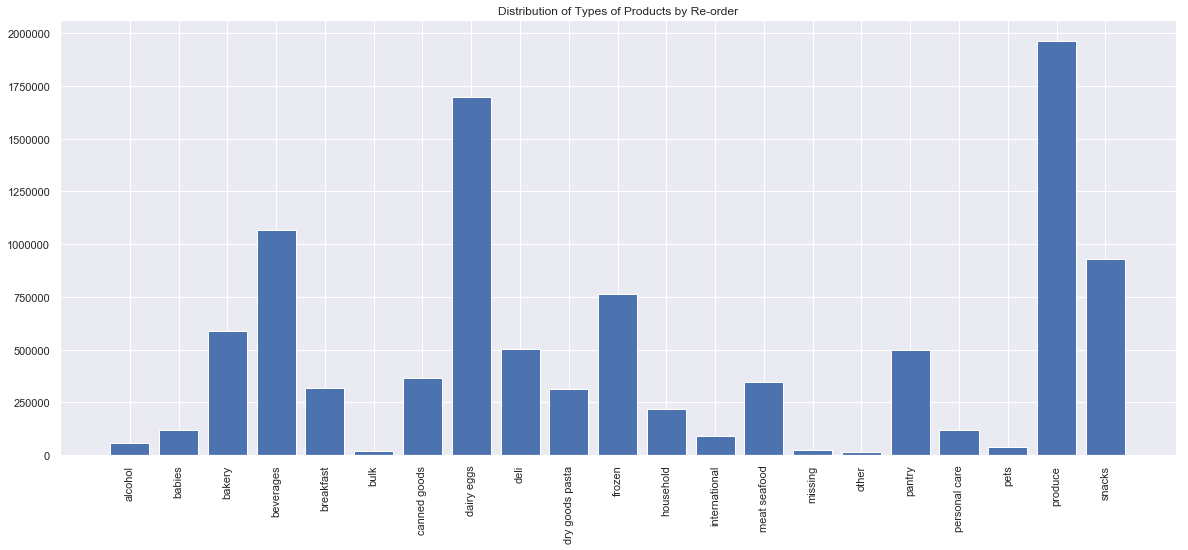

In [52]:
#Plot most popular categories by re-order count
plt.rcParams['figure.figsize']=(20,8)
p=plt.bar(df_oppPd_reOrd_Dep['department'],df_oppPd_reOrd_Dep['ReOrdCnt'])
plt.title('Distribution of Types of Products by Re-order')
#p.set(xlabel='Product Type',ylabel='Re-Order Count')
plt.xticks(rotation=90)

### *Outlier Detection*
_____________________
#### Prior Eval Set

In [19]:
# Detect outliers in the prior orders dataset by order count
df_ord_pri = df_ord[df_ord['eval_set']=='prior']

In [20]:
# Group prior order dataset to get order count by user
df_usrOrd_pri = df_ord.groupby(['user_id','eval_set']
                              )['order_id'].nunique().reset_index().rename(columns={'order_id':'OrdCnt'})

In [21]:
df_usrOrd_pri.head(3)

,user_id,eval_set,OrdCnt
0,1,prior,10
1,1,train,1
2,2,prior,14


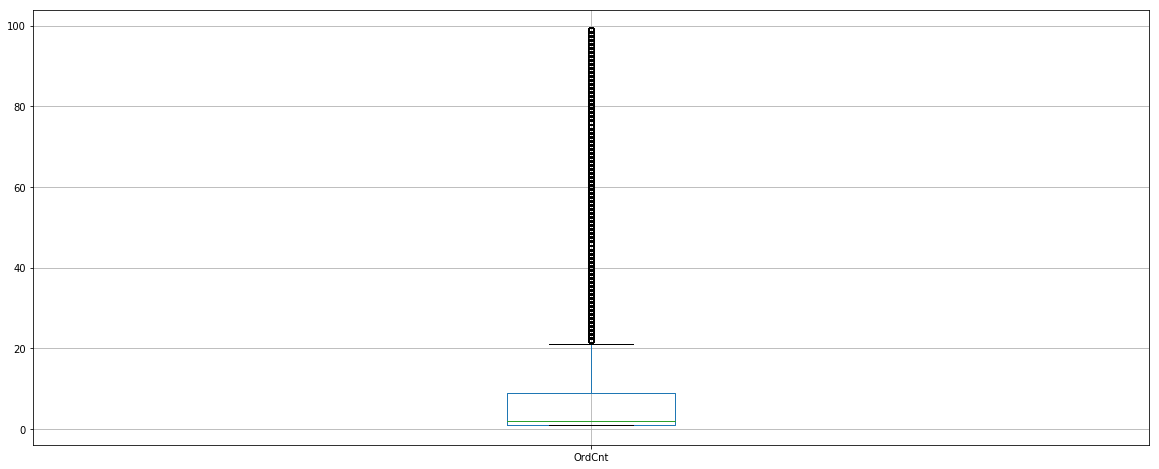

In [22]:
df_usrOrd_pri.boxplot(column=['OrdCnt'])

In [23]:
df_usrOrd_pri['OrdCnt'].max()

99

In [24]:
df_usrOrd_pri['OrdCnt'].quantile(q=[.25,.5,.75])

0.25    1.0
0.50    2.0
0.75    9.0
Name: OrdCnt, dtype: float64

In [25]:
df_usrOrd_pri['OrdCnt'].describe()

count    412418.000000
mean          8.295184
std          13.853167
min           1.000000
25%           1.000000
50%           2.000000
75%           9.000000
max          99.000000
Name: OrdCnt, dtype: float64

In [26]:
print('Total Users in prior eval set: ',len(df_usrOrd_pri.index))

print('Count of outlier accounts by number of orders: ',len(df_usrOrd_pri[df_usrOrd_pri['OrdCnt']>40].index))

print('Percentage of outlier accounts by number of orders in eval set',str((len(
    df_usrOrd_pri[df_usrOrd_pri['OrdCnt']>40].index)/len(df_usrOrd_pri.index))*100),'%')

Total Users in prior eval set:  412418
Count of outlier accounts by number of orders:  17017
Percentage of outlier accounts by number of orders in eval set 4.126153562647605 %


#### Train Eval Set

In [27]:
# Detect outliers in the train orders dataset by order count
df_ord_trn = df_ord[df_ord['eval_set']=='train']

In [28]:
# Group train order dataset to get order count by user
df_usrOrd_trn = df_ord_trn.groupby(['user_id']
                                  )['order_id'].nunique().reset_index().rename(columns={'order_id':'OrdCnt'})

In [29]:
df_usrOrd_trn.head(3)

,user_id,OrdCnt
0,1,1
1,2,1
2,5,1


In [30]:
df_usrOrd_trn['OrdCnt'].max()

1

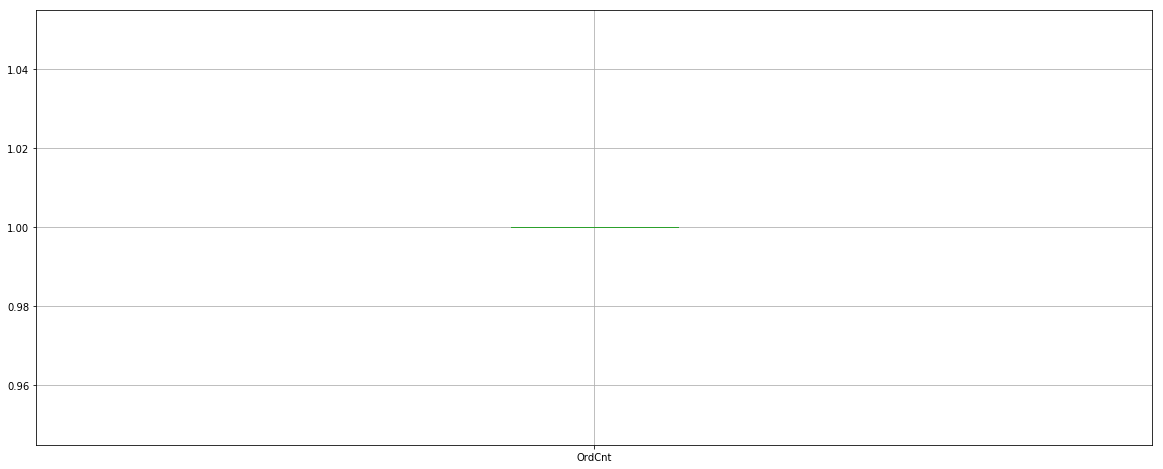

In [31]:
df_usrOrd_trn.boxplot(column=['OrdCnt'])

In [32]:
print('Total Users in train eval set: ',len(df_usrOrd_trn.index))

Total Users in train eval set:  131209


#### Test Eval Set

In [33]:
# Detect outliers in the test dataset by order count
df_ord_tst = df_ord[df_ord['eval_set']=='test']

In [34]:
# Group test order dataset to get order count by user
df_usrOrd_tst = df_ord_tst.groupby(['user_id'])['order_id'].nunique().reset_index().rename(columns={'order_id':'OrdCnt'})

In [35]:
df_usrOrd_tst.head(3)

,user_id,OrdCnt
0,3,1
1,4,1
2,6,1


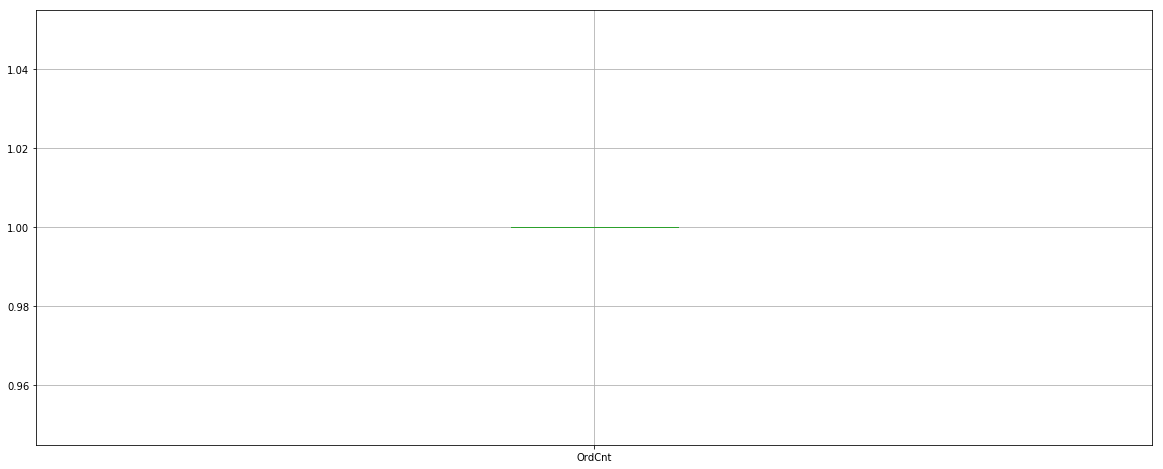

In [36]:
df_usrOrd_tst.boxplot(column=['OrdCnt'])

In [37]:
df_usrOrd_tst['OrdCnt'].max()

1

In [38]:
print('Total Users in test eval set: ',len(df_usrOrd_tst.index))

Total Users in test eval set:  75000


### *Order Placement Distribution By DOW and Hour of the Day*

In [39]:
# Count number of orders by day of the week and hour of the day to determine any trend in orders.
df_ordPri_dh=df_ord_pri.groupby(['order_dow','order_hour_of_day']
                               )['order_id'].nunique().reset_index().rename(columns={'order_id':'OrdCnt'})

In [40]:
# Group dataset to get order count by day of the week and hour of the day
df_ordPri_dh.head()

,order_dow,order_hour_of_day,OrdCnt
0,0,0,3692
1,0,1,2235
2,0,2,1299
3,0,3,888
4,0,4,750


C:\Users\RajChoul\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5,0.98,'Order Distribution by Day of Week & Hour of Day')

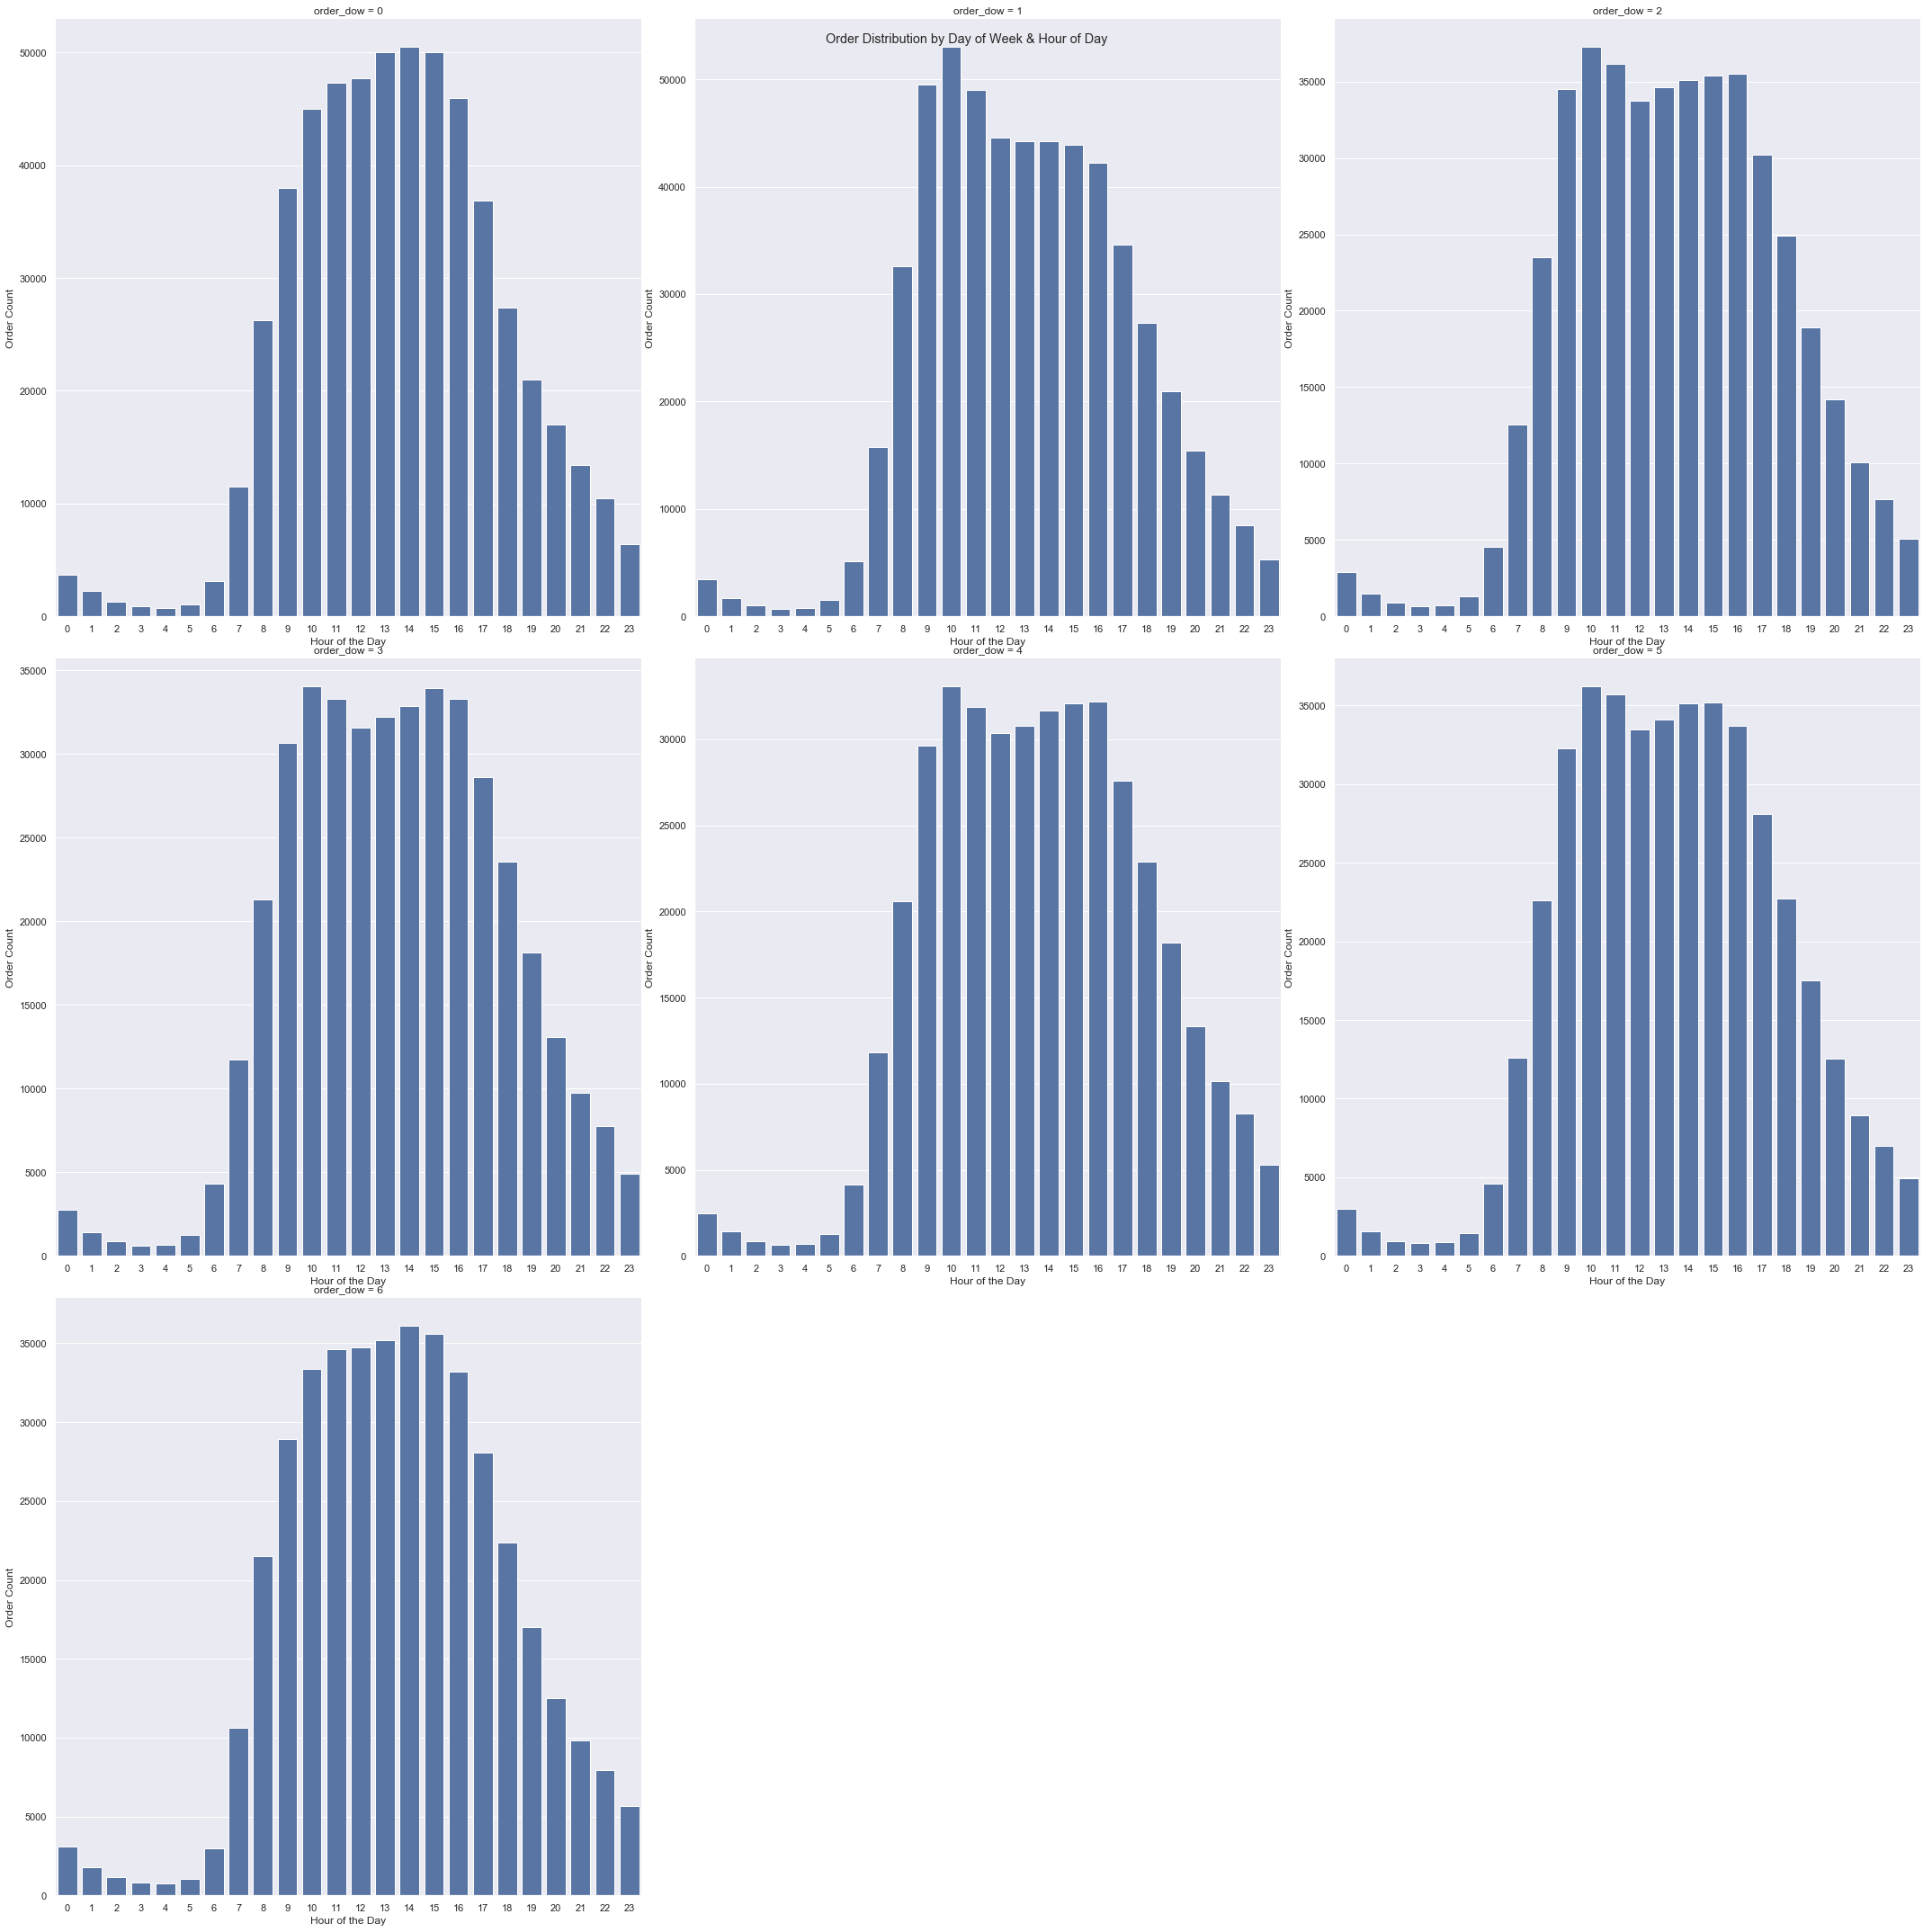

In [42]:
# plot for order distribution by hour of the day for each day of the week
sns.set(color_codes=True)
grid = sns.FacetGrid(df_ordPri_dh, col='order_dow',col_wrap=3,sharex=False
                     ,sharey=False,height=10,aspect=1)
p=grid.map(sns.barplot, 'order_hour_of_day','OrdCnt')
p.set_xticklabels(df_ordPri_dh['order_hour_of_day'])
p.set(xlabel='Hour of the Day',ylabel='Order Count')
p.fig.suptitle('Order Distribution by Day of Week & Hour of Day')

### Are certain types of products ordered during particular day or hour of the day

In [55]:
df_oppPd_Ord_pri = df_oppPd.merge(df_ord_pri,on='order_id',how='inner')
df_oppPd_Ord_pri.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [56]:
# Group dataset to get order count by product category and day of the week
df_oppPd_ord_pri_dow=df_oppPd_Ord_pri.groupby(['department','order_dow']
                               )['order_id'].nunique().reset_index().rename(columns={'order_id':'OrdCnt'})
df_oppPd_ord_pri_dow.head()

,department,order_dow,OrdCnt
0,alcohol,0,11231
1,alcohol,1,11455
2,alcohol,2,11012
3,alcohol,3,11755
4,alcohol,4,12780


C:\Users\RajChoul\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5,0.98,'Product Order Distribution by Day of Week')

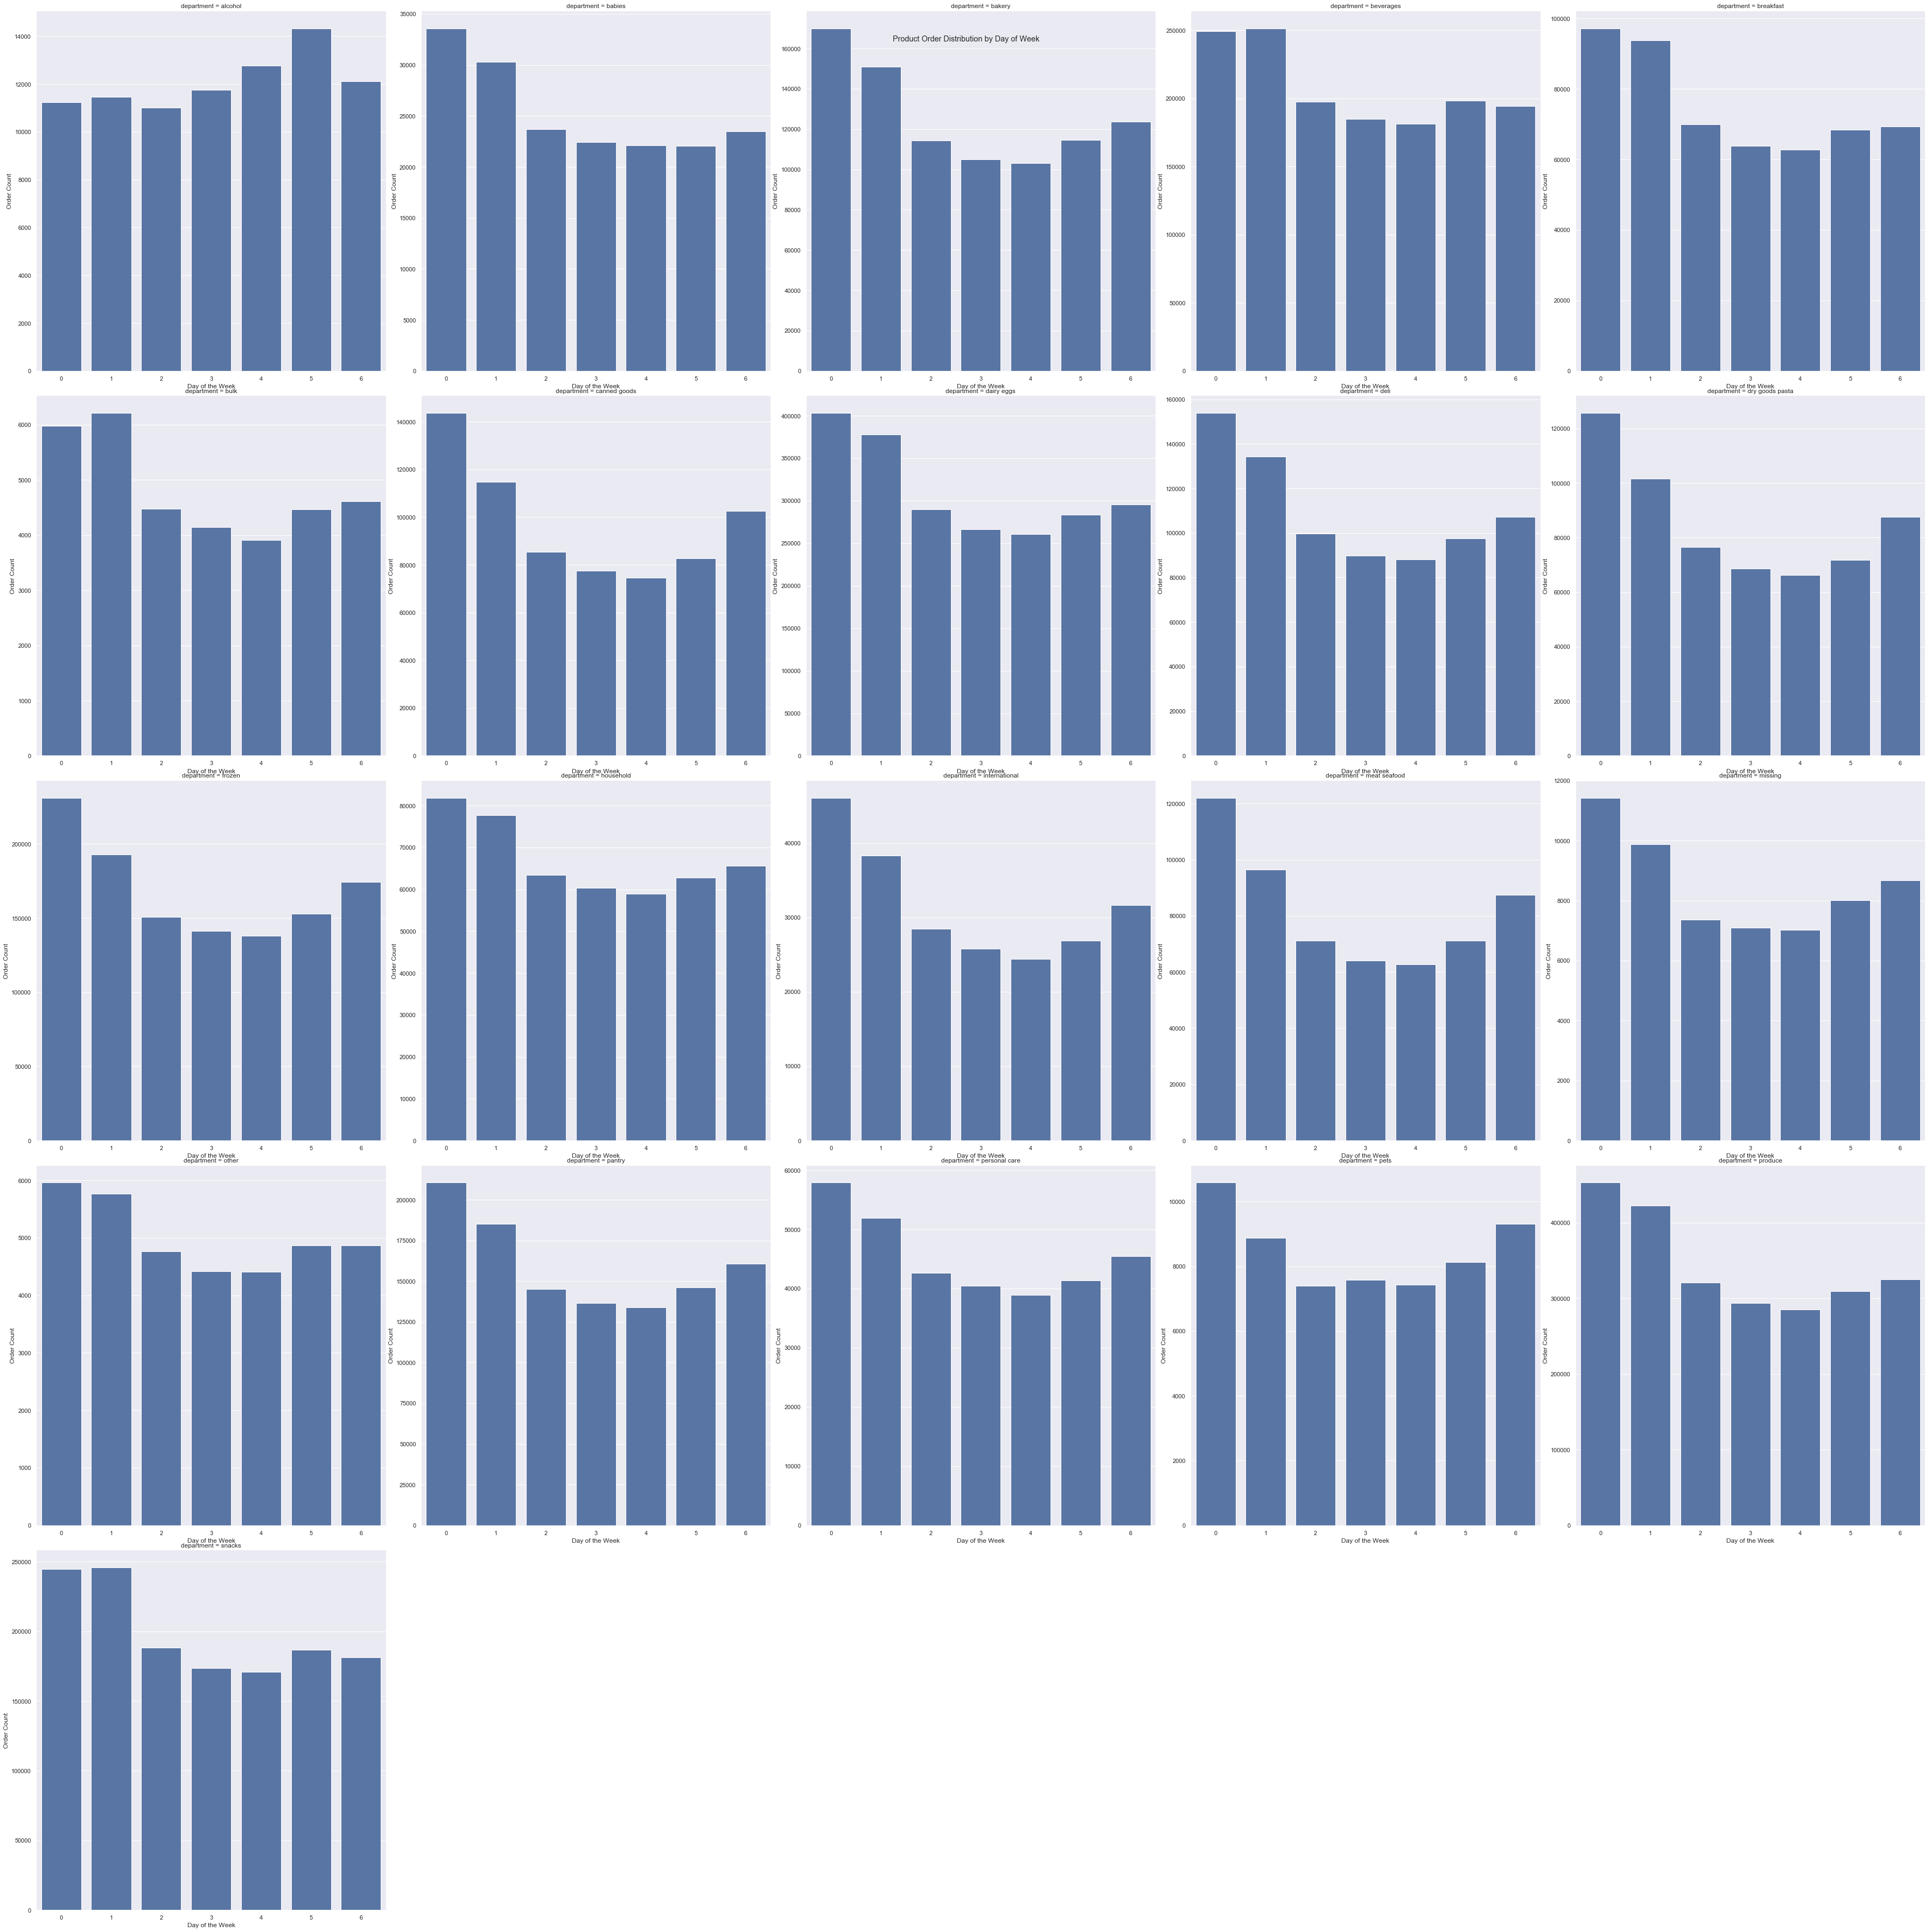

In [58]:
#Order distribution by day of the week for each product category
sns.set(color_codes=True)
grid = sns.FacetGrid(df_oppPd_ord_pri_dow, col='department',col_wrap=5,sharex=False
                     ,sharey=False,height=10,aspect=1)
p=grid.map(sns.barplot, 'order_dow','OrdCnt')
p.set_xticklabels(df_oppPd_ord_pri_dow['order_dow'])
p.set(xlabel='Day of the Week',ylabel='Order Count')
p.fig.suptitle('Product Order Distribution by Day of Week')